# [Python] Data Exploration, KNN and Bayes Classification

## 1: Python & Data Exploration

Import the package and load the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = np.genfromtxt("HW1-code/data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns

(a) Use X.shape[1] to get the number of features, and X.shape[0] to get the number of data points.()

In [4]:
X.shape[1] #Number of Col

4

In [5]:
X.shape[0] #Number of Row

148

(b) For each feature, plot a histogram (􏰀plt.hist􏰁) of the data values

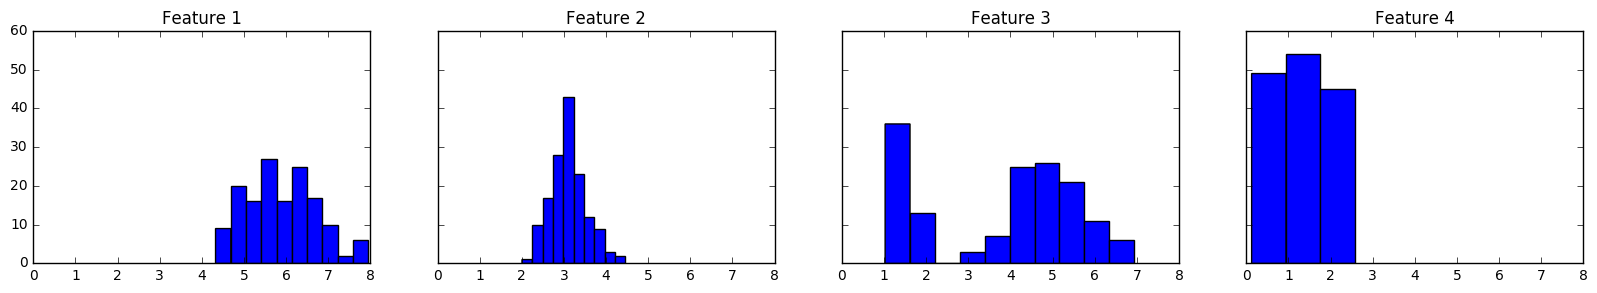

In [6]:
%matplotlib inline  
plt.rcParams['figure.figsize'] = (20.0, 3.0) #adjust the plot size
featuresnum = X.shape[1]
fig, ax = plt.subplots(nrows= 1, ncols=featuresnum, sharex=True, sharey=True) #Return a subplot axes positioned by the given grid definition. Share let x, y axis be shared
for i in range(featuresnum):
    if i < featuresnum-1:
        ax[i].hist(X[:,i])
        ax[i].set_title("Feature {}".format(i+1))
    else:
        ax[i].hist(X[:,i], bins=3)
        ax[i].set_title("Feature {}".format(i+1))

(c) Compute the mean of the data points for each feature (np.mean)
(d) Compute the variance and standard deviation of the data points for each feature

In [7]:
mean = []
var = []
std = []

for i in range(featuresnum):
    mean.append(np.mean(X[:,i]))
    var.append(np.var(X[:,i]))
    std.append(np.std(X[:,i]))
    
print ("mean=",end='')
print (mean)
print ("var=",end='')
print (var)
print ("std=",end='')
print (std)

mean=[5.900103764189188, 3.0989309168918919, 3.8195548405405404, 1.2525554845945945]
var=[0.69455900490466493, 0.19035056790635788, 3.0767163428400019, 0.57573564154176571]
std=[0.83340206677489403, 0.43629183800107685, 1.7540571093439352, 0.75877245702632468]


(e) 􏰀Normalize􏰁 the data by subtracting the mean value from each feature, and dividing by its standard deviation. (This will make the data zero-mean and unit variance.) Show your code. Note: you can do this with a for-loop (straightforward but slow), or in a simpler 􏰀vectorized􏰁 form using arithmetic operators directly on the numpy arrays.

In [8]:
for i in range(featuresnum):
    X[:,i] = (X[:,i]-mean[i])/std[i]
print(X)

[[ -1.15195834e+00  -3.89805983e-02  -1.34265021e+00  -1.28793575e+00]
 [ -1.35143193e+00   4.17851693e-01  -1.40424546e+00  -1.37551433e+00]
 [ -1.53583344e+00   9.12957329e-02  -1.30662681e+00  -1.28709883e+00]
 [ -9.87110060e-01   1.30537208e+00  -1.32314047e+00  -1.34555748e+00]
 [ -5.81327769e-01   2.05218091e+00  -1.16489037e+00  -1.11736575e+00]
 [ -1.50582620e+00   8.52020943e-01  -1.36123375e+00  -1.23455833e+00]
 [ -1.06638656e+00   8.02746585e-01  -1.30672623e+00  -1.28963183e+00]
 [ -1.70229427e+00  -2.45875828e-01  -1.37224890e+00  -1.35738469e+00]
 [ -1.17881369e+00   2.21119385e-01  -1.27915809e+00  -1.43882585e+00]
 [ -5.30125232e-01   1.43808187e+00  -1.27875879e+00  -1.32283440e+00]
 [ -1.29066642e+00   8.32585099e-01  -1.24083796e+00  -1.32846956e+00]
 [ -1.26466661e+00  -1.16180530e-01  -1.33631062e+00  -1.45596341e+00]
 [ -1.88809931e+00  -2.04150317e-01  -1.50772482e+00  -1.48590675e+00]
 [ -3.82586814e-02   2.09272740e+00  -1.46106688e+00  -1.26815491e+00]
 [ -1.

(f) For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot (see plt.plot􏰁 or 􏰀plt.scatter􏰁) of the feature values, colored according to their target value (class). (For example, plot all data points with y = 0 as blue, y = 1 as green, etc.)

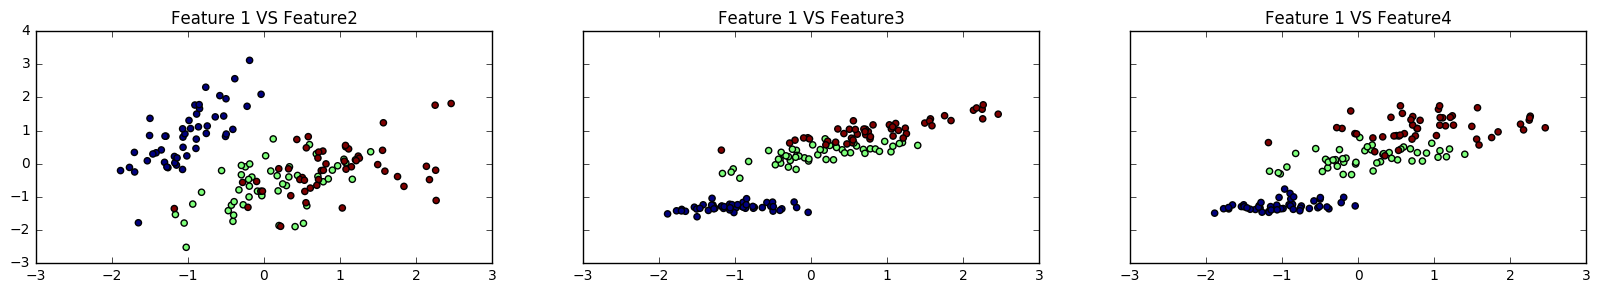

In [9]:
%matplotlib inline  
plt.rcParams['figure.figsize'] = (20.0, 3.0) #adjust the plot size
fig, ax = plt.subplots(nrows= 1, ncols=featuresnum-1, sharex=True, sharey=True) #Return a subplot axes positioned by the given grid definition. Share let x, y axis be shared
for i in range(1,featuresnum):
    if i < featuresnum:
        ax[i-1].scatter(X[:,0],X[:,i],c=Y[:])
        ax[i-1].set_title("Feature 1 VS Feature{}".format(i+1))


## 2: kNN predictions

In [53]:
iris = np.genfromtxt("HW1-code/data/iris.txt",delimiter=None) # load the data Y = iris[:,-1]
X = iris[:,0:-1]
# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that one value (here, co # indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import sys
sys.path.append('/Users/TimLin/Documents/Python/HW01/HW1-code');
# Make sure the "mltools" directory is in a directory on your Python path,

import mltools as ml
X,Y = ml.shuffleData(X,Y); # shuffle data randomly, X and Y corresponding
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y, 0.75); # split data into 75/25 train/test

Build and 􏰀train􏰁 a kNN classi􏰂er on Xtr,Ytr and make predictions on some data Xte with it

In [15]:
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, 1) # where K is an integer, e.g. 1 for nearest neighbor predic 
YteHat = knn.predict(Xte) # get estimates of y for each data point in Xte

(a) Modify the code listed above to use only the 􏰂rst two features of X (e.g., let X be only the 􏰂rst two columns of iris, instead of the 􏰂rst four), and visualize (plot) the classi􏰂cation boundary for varying values of K = [1, 5, 10, 50] using plotClassify2D.

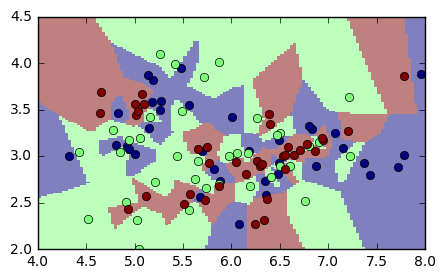

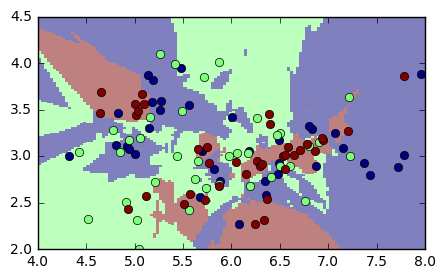

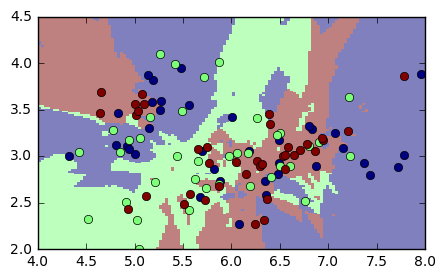

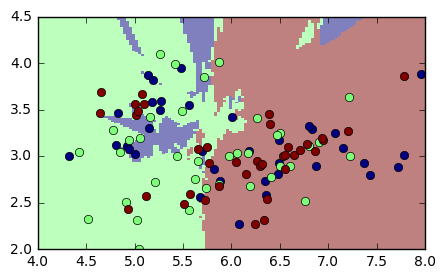

In [33]:
X2 = iris[:,0:2]
X2,Y = ml.shuffleData(X2,Y); # shuffle data randomly, X and Y corresponding
Xtr,Xte,Ytr,Yte = ml.splitData(X2,Y, 0.75); # split data into 75/25 train/test
plt.rcParams['figure.figsize'] = (5.0, 3.0) #adjust the plot size


K = [1, 5, 10, 50] 
for k in K:
    knn = ml.knn.knnClassify(Xtr, Ytr, k) # create the object and train it
    ml.plotClassify2D( knn, Xtr, Ytr );
    plt.show()

(b) Again using only the 􏰂rst two features, compute the error rate (number of misclassi􏰂cations) on both the training and test data as a function of K = [1, 2, 5, 10, 50, 100, 200]. You can do this most easily with a for-loop:

In [118]:
X,Y = ml.shuffleData(X,Y); # shuffle data randomly, X and Y corresponding
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y, 0.75); # split data into 75/25 train/test

def counterror(Y1, Y2):
    count = 0
    for i in range(len(Y1)):
        if Y1[i]!=Y2[i]:
            count = count + 1
    return count/len(Y1)
    
K = [1, 2, 5, 10, 50, 100, 200] 
errTrain = []
errTest = []

for k in K:
    knn = ml.knn.knnClassify(Xtr, Ytr, k) # create the object and train it
    YtrHat = knn.predict(Xtr)
    errTrain.append(counterror(Ytr, YtrHat))
    YteHat = knn.predict(Xte)
    errTest.append(counterror(Yte, YteHat))

Plot the resulting error rate functions using a semi-log plot (􏰀semilogx􏰁), with training error in red and test error in green. Based on these plots, what value of K would you recommend?

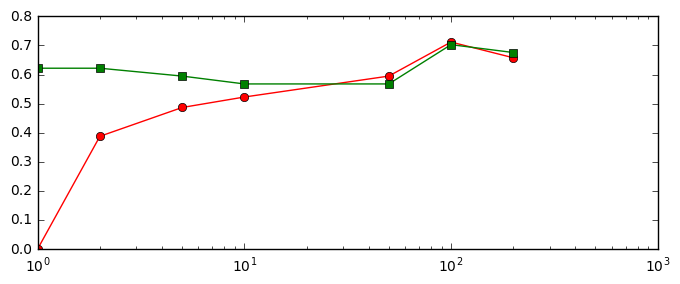

In [119]:
plt.rcParams['figure.figsize'] = (8.0, 3.0)
plt.semilogx(K, errTrain, "ro-")
plt.semilogx(K, errTest, "gs-")    


In this case, k=50 seems like the best choice

## Bayes Classi􏰂ers

(a) Compute all the probabilities necessary for a naïve Bayes classi􏰂er, i.e., the class probability p(y) and all the individual feature probabilities p(xi|y), for each class y and feature xi

In [75]:
import numpy as np
mail = np.genfromtxt("HW1-code/data/p3.csv",skip_header=1, delimiter=",") # load the text file
X = mail[:,0:-1]
Y = mail[:,-1]

pprior = np.mean(Y==1)
PXi1 = []
pconditiony1 = []
pconditiony0 = []

for i in range(X.shape[1]):
    PXi = X[:,i]==1
    PY1 = Y[:]==1
    PY0 = Y[:]!=1
    PXi1.append(round(np.mean(PXi),2))
    pconditiony1.append(round(np.mean(PXi & PY1)/pprior,2))
    pconditiony0.append(round(np.mean(PXi & PY0)/(1-pprior),2))

PXi1 = np.array(PXi1)        
pconditiony1 = np.array(pconditiony1)
pconditiony0 = np.array(pconditiony0)

print("P(Y=1)=", end = "")
print(pprior)
print("P(Y=-1)=", end = "")
print(1-pprior)
print("P(X=1)=", end = "")
print(PXi1)
print("P(X=-1)=", end = "")
print(1-PXi1)
print("P(Xi=1/Y=1)=", end = "")
print(pconditiony1)
print("P(Xi=0/Y=1)=", end = "")
print(1-pconditiony1)
print("P(Xi=1/Y=-1)=", end = "")
print(pconditiony0)
print("P(Xi=0/Y=-1)=", end = "")
print(1-pconditiony0)



P(Y=1)=0.4
P(Y=-1)=0.6
P(X=1)=[ 0.6  0.5  0.7  0.7  0.3]
P(X=-1)=[ 0.4  0.5  0.3  0.3  0.7]
P(Xi=1/Y=1)=[ 0.75  0.    0.75  0.5   0.25]
P(Xi=0/Y=1)=[ 0.25  1.    0.25  0.5   0.75]
P(Xi=1/Y=-1)=[ 0.5   0.83  0.67  0.83  0.33]
P(Xi=0/Y=-1)=[ 0.5   0.17  0.33  0.17  0.67]


(b) Which class would be predicted for x =(00000)? What about for x =(11010)?

In [68]:
def mailpredicted(xl):
    PXY1 = 1
    for i,x in enumerate(xl):
        if x == 1:
            PXY1 = PXY1 * pconditiony1[i]
        else:
            PXY1 = PXY1 * (1-pconditiony1[i])
    PY1 = PXY1 * pprior
    
    PXY0 = 1
    for i,x in enumerate(xl):
        if x == 1:
            PXY0 = PXY0 * pconditiony0[i]
        else:
            PXY0 = PXY0 * (1-pconditiony0[i])
    PY0 = PXY0 * (1-pprior)
    
    if PY1>PY0:
        result = 1
    else:
        result = -1
    
    print("P(Xi|Y=1)P(Y=1)=", end='')
    print(PY1, end='')
    print("   P(Xi|Y=-1)P(Y=-1)=", end='')
    print(PY0)
    print("Predicetd result is ", end='')
    print(result)
    
case1 = [0,0,0,0,0]
mailpredicted(case1)
case2 = [1,1,0,1,0]
mailpredicted(case2)


P(Xi|Y=1)P(Y=1)=0.009375   P(Xi|Y=-1)P(Y=-1)=0.001916937
Predicetd result is 1
P(Xi|Y=1)P(Y=1)=0.0   P(Xi|Y=-1)P(Y=-1)=0.045694737
Predicetd result is -1


(C) Compute the posterior probability that y = +1 given the observation x = (1 1 0 1 0).

In [79]:
def postpredicted(xl,y):
    
    if y==1:
        PXY = 1 #P(Xi|Y=1)
        for i,x in enumerate(xl):
            if x == 1:
                PXY = PXY * pconditiony1[i]
            else:
                PXY = PXY * (1-pconditiony1[i])
        PXYPY = PXY * pprior    #P(Xi|Y=1)P(Y=1)   
    
    if y==-1:
        PXY = 1 #P(Xi|Y=-1)
        for i,x in enumerate(xl):
            if x == 1:
                PXY = PXY * pconditiony0[i]
            else:
                PXY = PXY * (1-pconditiony0[i])
        PXYPY = PXY * (1-pprior)  #P(Xi|Y=-1)P(Y=-1)     
    
    PX = 1
    for i,x in enumerate(xl):
        if x == 1:
            PX = PX * PXi1[i]            
        else:
            PX = PX * (1-PXi1[i])            
    
    
    postp = PXYPY/PX
    print(postp)
    
postpredicted([1,1,0,1,0],1)

0.0


(d) Why should we probably not use a joint Bayes classier (using the joint probability of the
features x, as opposed to a naïve Bayes classier) for these data?

We do not have enough data to use the joint classfier, since the  data at least should be 2^5*2 to make sure every comnination have a training outcome.

(e) Suppose that, before we make our predictions, we lose access to my address book, so that we cannot tell whether the email author is known. Should we re-train the model, and if so, how? (e.g.: how does the model, and its parameters, change in this new situation?) Hint: what will the naïve Bayes model over only features x2 . . . x5 look like, and what will its parameters be?

We should retrain the model since we don't have the essential imput for one of the x predictor, unless we impute it by our knowhow.

In [1]:

c = get_config()

#Export all the notebooks in the current directory to the sphinx_howto format.
c.NbConvertApp.notebooks = ['*.ipynb']
c.NbConvertApp.export_format = 'latex'
c.Exporter.template_file = 'article'
c.NbConvertApp.postprocessor_class = 'PDF'

NameError: name 'get_config' is not defined